# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

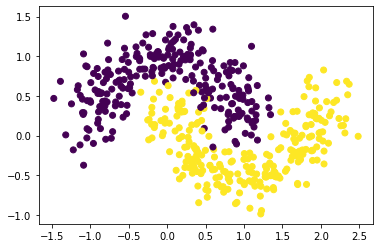

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
!pip install mlxtend

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Посмотрим на количество разных лейблов:

In [10]:
np.unique(moons_labels, return_counts=True)

(array([0, 1], dtype=int64), array([250, 250], dtype=int64))

Т.к. метки сбалансированы, будем использовать метрику f1_score.

In [11]:
lr = LogisticRegression(penalty = 'l2', class_weight= 'balanced', max_iter=1000, C=2, solver='saga')
svm = SVC(kernel='linear', C=1000, coef0=5.0, degree=3, class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1000, class_weight='balanced', coef0=5.0, kernel='linear')

In [12]:
# логистическая регрессия
f1_score(y_test, lr.predict(X_test))

0.8627450980392156

In [13]:
# svm
f1_score(y_test, svm.predict(X_test))

0.8627450980392156

Ого, получили практически одинаковый результат. Посмотрим, как это выглядит графически:

Text(0.5, 1.0, 'LinReg')

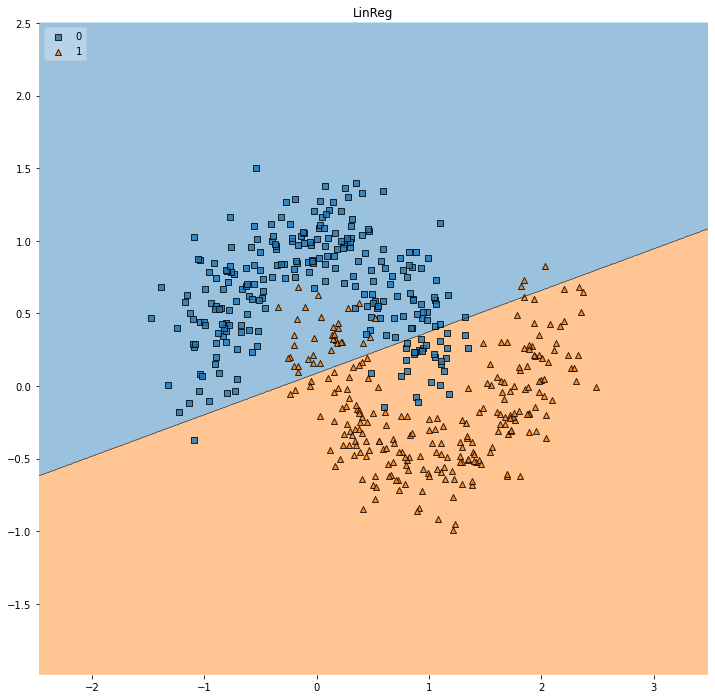

In [16]:
plt.figure(figsize=(12, 12))
plot_decision_regions(moons_points, moons_labels, clf = lr, legend=2)
plt.title("LinReg")

Text(0.5, 1.0, 'SVM')

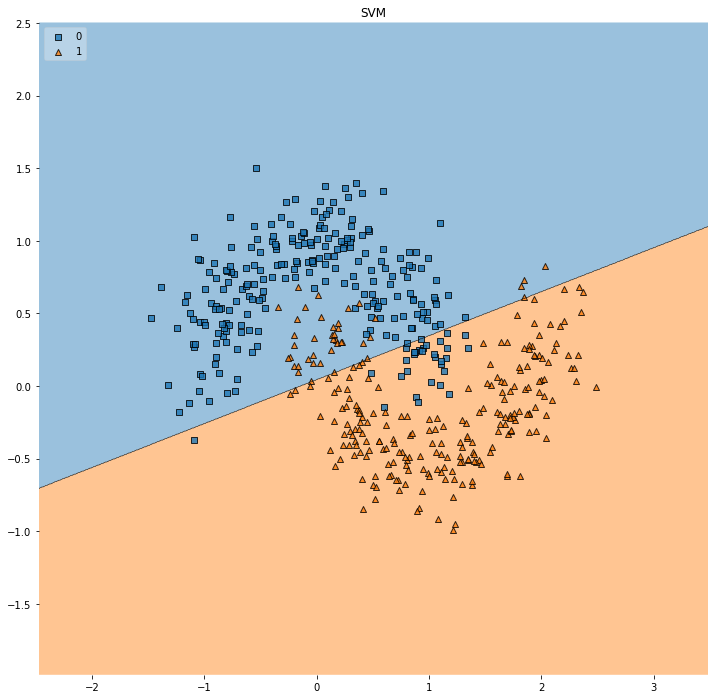

In [17]:
plt.figure(figsize=(12, 12))
plot_decision_regions(moons_points, moons_labels, clf = svm, legend=2)
plt.title("SVM")

В этом пункте мы работали с линейными ядрами классификаторов, т.е. классы разделялись лишь одной прямой. Подход не лучший, т.к. мы специально генерировали выборку, которая не является линейно разделимой.

Поэтому будем отображать исходное пространство признаков в другое, используя Kernel Trick, чтобы в нем уже можно было разделять классы.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Поищем параметры с помощью Grid Search. Здесь попробуем обучать на всей выборке.

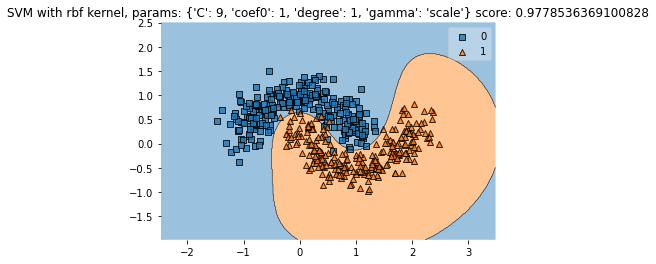

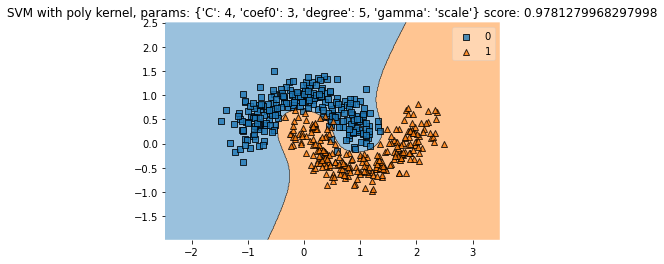

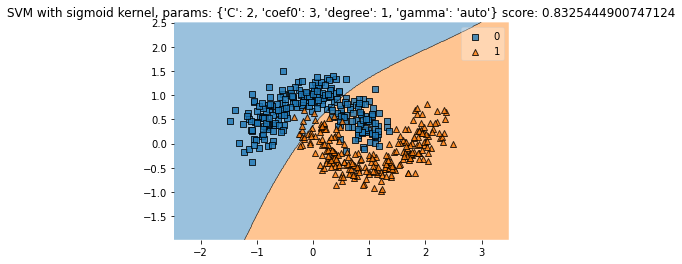

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'degree': range(1, 6),
    'coef0': range(1, 10, 2),
    'gamma': ['scale', 'auto'],
    'C': range(1, 10)
}

kernels = ['rbf', 'poly', 'sigmoid']

for k in kernels:
    gd = GridSearchCV(SVC(kernel=k), parameters, scoring='f1', cv=5)
    gd.fit(moons_points, moons_labels)
    plot_decision_regions(moons_points, moons_labels, gd.best_estimator_)
    plt.title("SVM with " + k + " kernel, params: " + str(gd.best_params_) + 
                   " score: " + str(gd.best_score_))
    plt.show()

Изобразим все возможные варианты, которые перебирал GridSearch:

In [ ]:
scores = []
params = []

for k in kernels:
    for deg in range(1, 6):
            for gamma in ['scale', 'auto']:
                for c in range(1, 10):
                    svc = SVC(kernel=k, degree=deg, gamma=gamma, C=c)
                    svc.fit(moons_points, moons_labels)
                    plt.figure(figsize=(10, 10))
                    score = f1_score(moons_labels, svc.predict(moons_points))
                    scores.append(score)
                    str_params = "SVC with params: kernel=" + k + ", deg=" + str(deg) + ", gamma=" + gamma + ", C=" + str(c)
                    params.append(str_params)
                    plot_decision_regions(moons_points, moons_labels, svc)
                    plt.title(str_params + " score: " + str(score))
                    plt.show()              

In [46]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
res_df = pd.DataFrame(list(zip(scores, params)), columns=['scores', 'params']).sort_values(by=['scores'], ascending=False)
res_df.head(15)

,scores,params
78,0.983871,"SVC with params: kernel=rbf, deg=5, gamma=scale, C=7"
42,0.983871,"SVC with params: kernel=rbf, deg=3, gamma=scale, C=7"
43,0.983871,"SVC with params: kernel=rbf, deg=3, gamma=scale, C=8"
6,0.983871,"SVC with params: kernel=rbf, deg=1, gamma=scale, C=7"
7,0.983871,"SVC with params: kernel=rbf, deg=1, gamma=scale, C=8"
25,0.983871,"SVC with params: kernel=rbf, deg=2, gamma=scale, C=8"
24,0.983871,"SVC with params: kernel=rbf, deg=2, gamma=scale, C=7"
79,0.983871,"SVC with params: kernel=rbf, deg=5, gamma=scale, C=8"
60,0.983871,"SVC with params: kernel=rbf, deg=4, gamma=scale, C=7"
61,0.983871,"SVC with params: kernel=rbf, deg=4, gamma=scale, C=8"


Итак, видим, что лучшим ядром является `rbf`, параметр `gamma` = scale, C 7 или 8, `degree` от 1 до 5.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

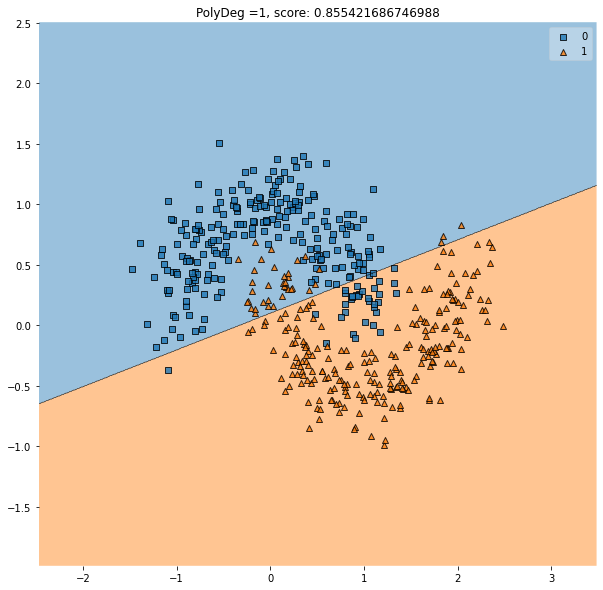

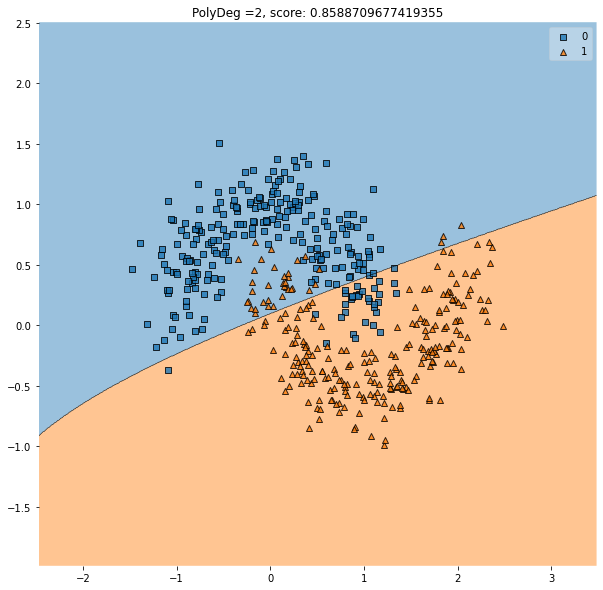

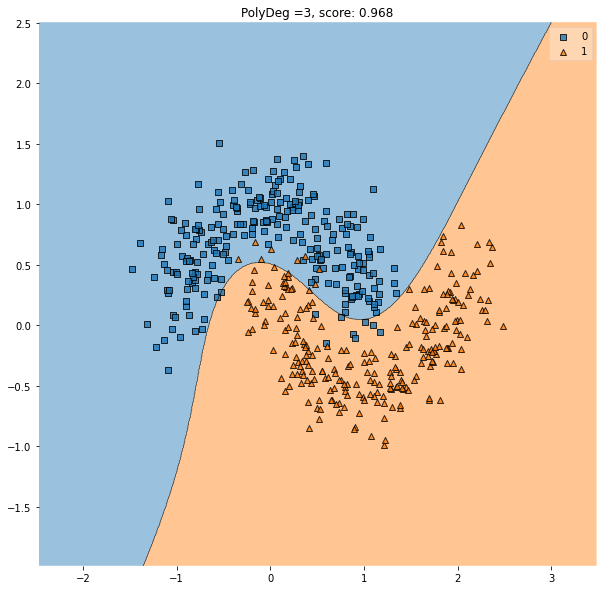

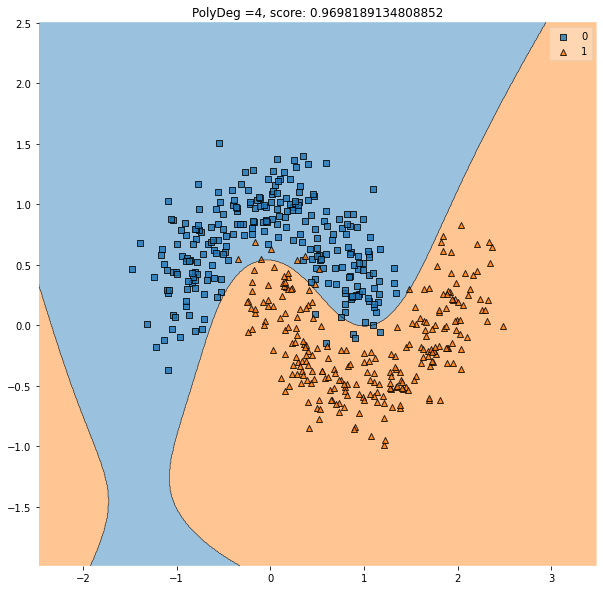

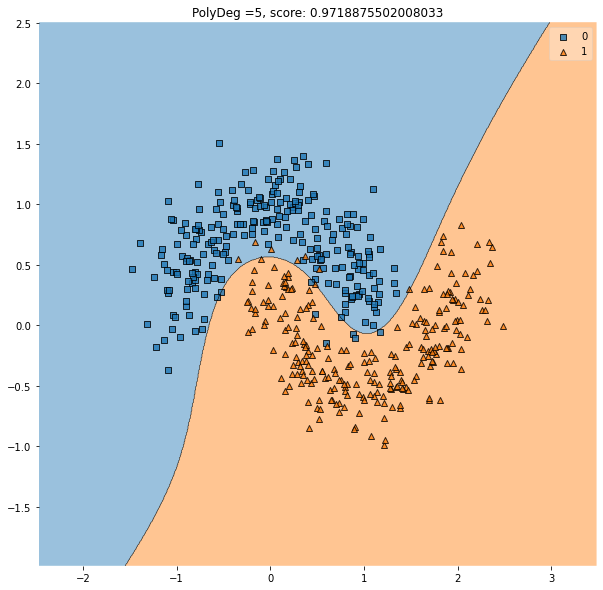

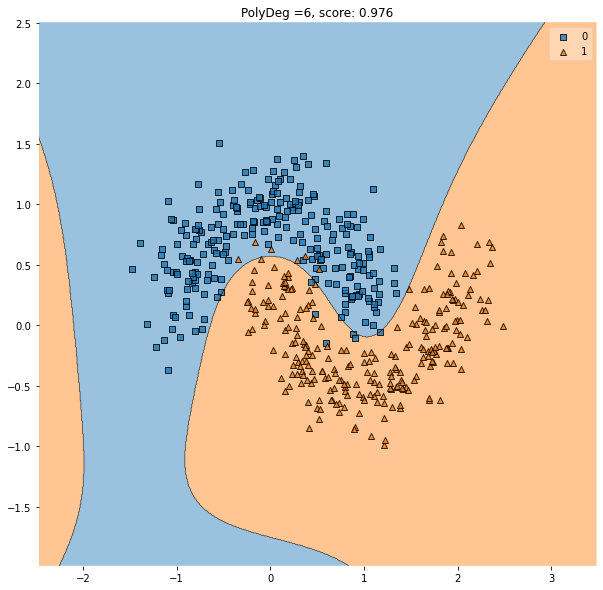

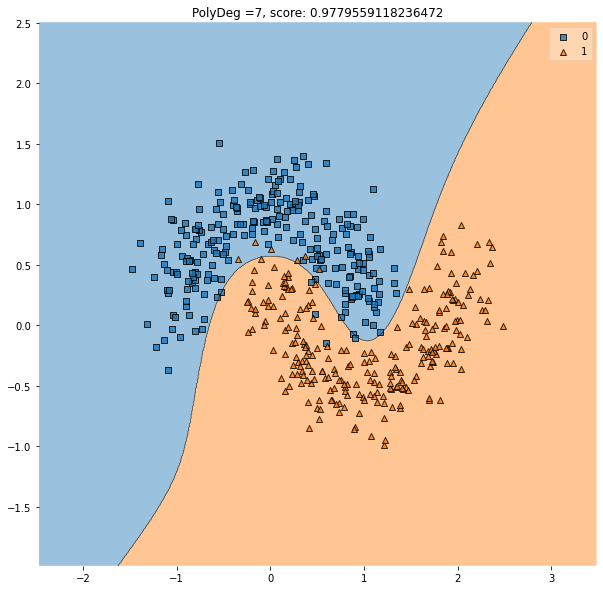

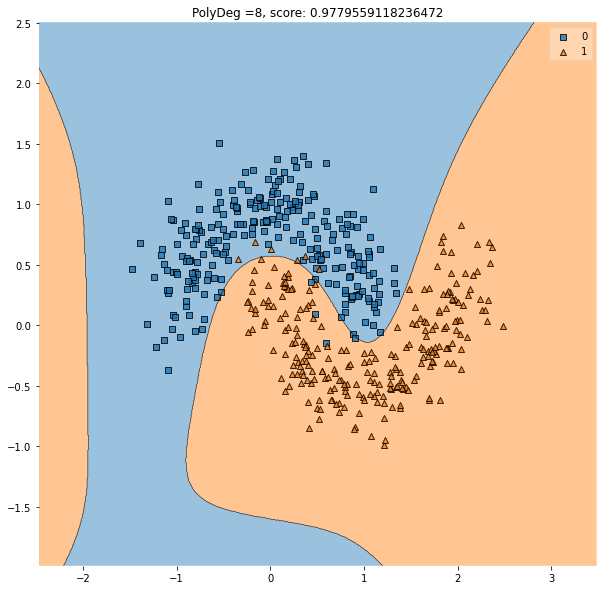

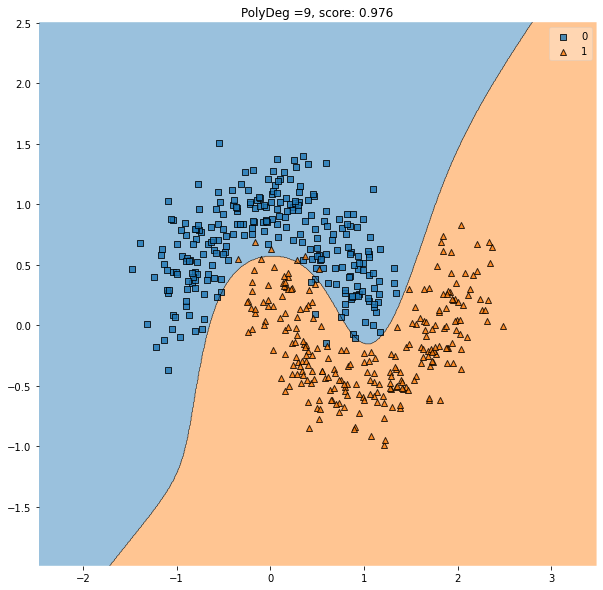

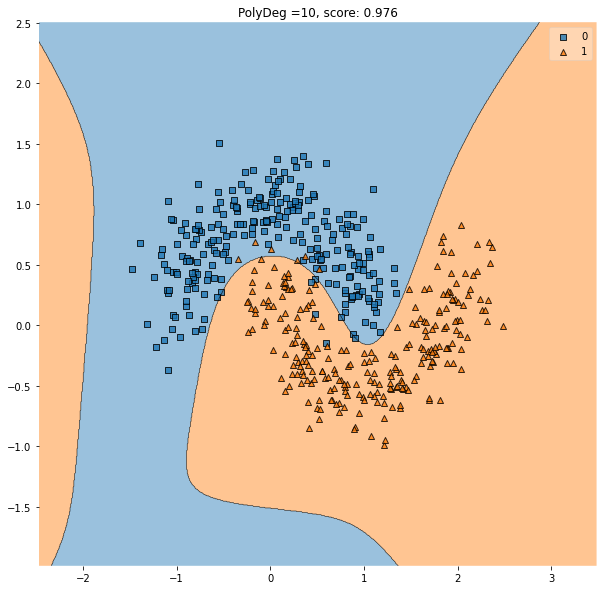

In [68]:
# здесь тоже возьмем всю выборку, не будем ничего дробить

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

deg = range(1, 11)

for d in deg:
    model = Pipeline([('PolyFeatures', PolynomialFeatures(d)),
                     ('LogReg', LogisticRegression())])
    model.fit(moons_points, moons_labels)
    plt.figure(figsize=(10, 10))
    plot_decision_regions(moons_points, moons_labels, model)
    plt.title("PolyDeg =" + str(d) + ", score: " + str(f1_score(moons_labels, model.predict(moons_points))))
    plt.show()  

Качество улучшилось практически до 1. Лучшим параметром `degree` для полиномиального преобразования является 7 или 8.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

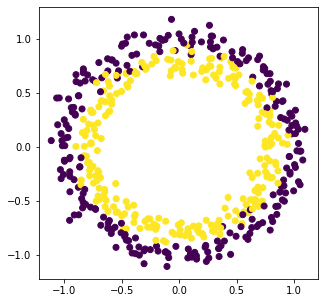

In [50]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

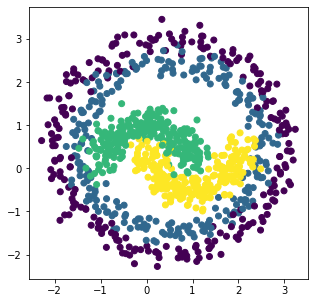

In [51]:
##### points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Посмотрим, что там по балансировке:

In [54]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([250, 250, 250, 250], dtype=int64))

Все супер, сбалансировано, будем опять использовать f1_score.

Сначала попытаемся подобрать логит модель с полиномированием фичей:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

deg = range(1, 15)
C = np.arange(0.1, 1, 0.1).tolist() + list(range(1, 11))
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

scores = []
params = []

for d in deg:
    for c in C:
        for s in solvers:
            model = Pipeline([('PolyFeatures', PolynomialFeatures(d)),
                             ('LogReg', LogisticRegression(C=c, solver=s))])
            model.fit(points, labels)
            plt.figure(figsize=(10, 10))
            
            score = f1_score(labels, model.predict(points), average='weighted')
            scores.append(score)
            
            str_params = "LogReg with C=" + str(c) + ", solver=" + s + ", degree=" + str(d)
            params.append(str_params)
            
            plot_decision_regions(points, labels, model)
            plt.title(str_params + ", score = " + str(score))
            plt.show()

In [63]:
import pandas as pd

res_df = pd.DataFrame(list(zip(scores, params)), columns=['scores', 'params']).sort_values(by=['scores'], ascending=False)
res_df.head(15)

,scores,params
947,0.953052,"LogReg with C=10, solver=newton-cg, degree=10"
942,0.953052,"LogReg with C=9, solver=newton-cg, degree=10"
852,0.953045,"LogReg with C=10, solver=newton-cg, degree=9"
827,0.953045,"LogReg with C=5, solver=newton-cg, degree=9"
832,0.953045,"LogReg with C=6, solver=newton-cg, degree=9"
837,0.953045,"LogReg with C=7, solver=newton-cg, degree=9"
842,0.952077,"LogReg with C=8, solver=newton-cg, degree=9"
937,0.952050,"LogReg with C=8, solver=newton-cg, degree=10"
822,0.952045,"LogReg with C=4, solver=newton-cg, degree=9"
817,0.952045,"LogReg with C=3, solver=newton-cg, degree=9"


Видим, что хорошее качество показывает логистическая регрессия с параметрами:
- solver - `newton-cg`
- С - 10 или 9
- degree - 10

Теперь попробуем GridSearchCV для SVM с разными ядрами:

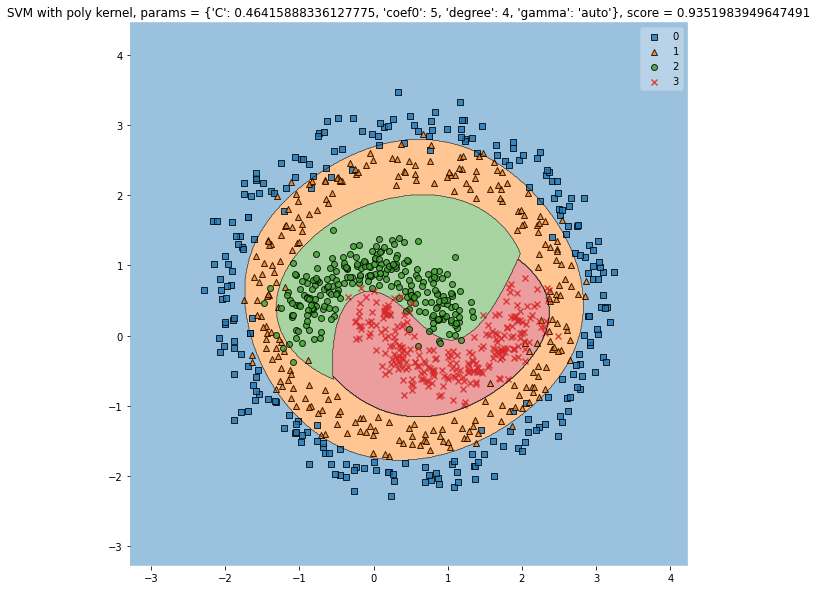

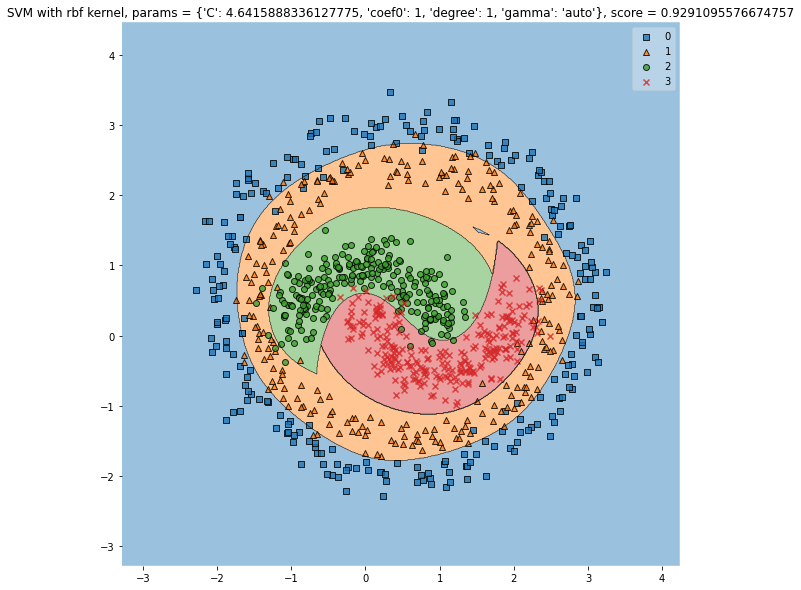

In [67]:
parameters = {
    'C' : np.logspace(-2, 1, 10),
    'degree' : range(1, 6),
    'coef0' : range(1, 10, 2),
    'gamma' : ['scale', 'auto'], 
}

for k in ['poly', 'rbf']:
    gd = GridSearchCV(SVC(kernel=k), parameters, scoring='f1_macro', cv=3)
    gd.fit(points, labels)
    plt.figure(figsize=(10, 10))
    plot_decision_regions(points, labels, gd.best_estimator_)
    plt.title("SVM with " + k + " kernel, params = " + str(gd.best_params_) + ", score = " 
              + str(gd.best_score_))
    plt.show()

Результаты получились хорошие:

__Логрег:__ 95.3%  
__SVM:__ 93.5% c ядром `poly`